# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 2381 Дудкин Михаил Валерьевич и Газукина Дарья Денисовна. Вариант №3.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

**Дискретный комплексный гармонический сигнал**:

$s(k) = Ce^{j\omega_0k}, \quad k \in ℕ$

**Дискретный нерекурсивный фильтр**

Для сигнала $x(n),\quad n \in [0, N-1]$ нерекурсивный фильтр в общем виде записывается как $y_n = \sum_{k=0}^{m}c_kx_{n-k}$.

**Передаточная функция**

Передаточной функцией фильтра называется такая функция, показывающая изменение сигнала в зависимости от его частоты:
$y_n = H(\omega) x_n$, или $H(\omega) = \frac{y_n}{x_n}$

Для гармонического входного сигнала $x_n = e^{i\omega n}$ получим:
$$H(\omega) = \frac{\sum_{k=0}^{m}c_ke^{i\omega (n-k)}}{e^{i\omega n}} = \sum_{k=0}^{m}c_ke^{i\omega (n-k)} e^{-i\omega n}$$

Зависимость передаточной функции от циклической частоты:

$H(2\pi f) = \tilde{H}(f)$

**Дискретное Преобразование Фурье**

Дискретное преобразование Фурье (ДПФ) — это преобразование сигнала, которое позволяет перейти от представления сигнала во временной области к представлению в частотной области.

Пусть дан дискретный сигнал $x(n)$, состоящий из $N$ отсчётов, где $n = 0, 1, 2, \dots, N-1$.

Прямое ДПФ этого сигнала вычисляется по формуле:
$$
X(k) = \sum_{n=0}^{N-1} x(n) \cdot e^{-j \frac{2\pi}{N} k n}, \quad k = 0, 1, \dots, N-1
$$

где:
* $X(k)$ — $k$-й отсчёт спектра сигнала в частотной области (комплексная амплитуда).
* $x(n)$ — $n$-й отсчёт сигнала во временной области.
* $N$ — количество отсчётов в сигнале (длина ДПФ).
* $j$ — мнимая единица ($j^2 = -1$).
* $e^{-j \frac{2\pi}{N} k n}$ — комплексная экспонента, представляющая собой дискретные гармонические колебания с частотой, определяемой индексом $k$.

Результат ДПФ $X(k)$ — это комплексное число, которое показывает амплитуду и фазу синусоидальной составляющей с частотой $\omega_k = \frac{2\pi k}{N}$.


## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

Импорт необходимых библиотек

In [3]:
from math import pi, cos, log10
import numpy as np
import matplotlib.pyplot as plt

Подготовим функции для вывода графиков

In [4]:
def signals_plot(signals, labels):
  colors = ['green', 'blue', 'red', 'orange', 'purple', 'brown', 'pink', 'gray']
  time_labels = np.arange(len(signals[0]))
  plt.figure(figsize=(8, 4))
  for i, (signal, title) in enumerate(zip(signals, labels)):
    plt.stem(time_labels, signal, label=labels[i], linefmt=colors[i], markerfmt=".", basefmt=" ")
    plt.title("График дискретных сигналов")
    plt.grid(True)
    plt.xlabel('Отсчеты')
    plt.ylabel('Уровень сигнала')
    plt.legend(fontsize=10)
    plt.tight_layout()
  plt.show()

def func_plot(f, functions, labels, ylabel, title, ylim=None):
  for i, func in enumerate(functions):
    plt.plot(f, func, label=labels[i], linewidth=2)
  plt.xlabel('$f$', fontsize=12)
  plt.ylabel(ylabel, fontsize=12)
  plt.title(title, fontsize=14)
  plt.grid(True, alpha=0.3)
  plt.legend(fontsize=10)
  plt.xlim(0, 0.5)
  plt.ylim(ylim)
  plt.show()

def spectrum_plot(spectrums, labels=None, Fs=1):
    colors = ['green', 'blue', 'red', 'orange', 'purple', 'brown', 'pink', 'gray']
    N = len(spectrums[0])
    f = np.arange(0, N // 2 + 1) / N
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
    # Амплитудный спектр
    for i, spectrum in enumerate(spectrums):
        amplitude = np.abs(spectrum) / N  # Нормировка
        ax1.stem(f, amplitude[:N // 2 + 1], label=labels[i], linefmt=colors[i], markerfmt=".", basefmt=" ")
    ax1.set_title('Амплитудный спектр сигналов', fontsize=14)
    ax1.set_xlabel('Частота')
    ax1.set_ylabel('Амплитуда')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    # Фазовый спектр
    for i, spectrum in enumerate(spectrums):
        phase = np.angle(spectrum)
        ax2.stem(f, phase[:N // 2 + 1], label=labels[i], linefmt=colors[i], markerfmt=".", basefmt=" ")
    ax2.set_title('Фазовый спектр сигналов', fontsize=14)
    ax2.set_xlabel('Частота')
    ax2.set_ylabel('Фаза (радианы)')
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    plt.tight_layout()
    plt.show()

### Задание 1

Сформировать дискретный сигнал посредством дискретизации с шагом $T = 1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k \cos (\omega_k t + \phi_k)$. Частота каждой из гармоник не должна превышать $π$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от $0$ до $π$, изменяющимися с шагом $Δω = 0.1π$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от $1$ до $11$, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $φ_k$ представляют собой случайные числа в промежутке от $0$ до $0.5$. Дискретная последовательность должна включать в себя $32$ отсчета $(N = 31)$.

In [5]:
def s(t, A, w, phi):
  res = np.zeros(t.shape)
  for k in range(11):
    res += A[k] * np.cos(w[k] * t + phi[k])
  return res

In [6]:
np.random.seed(3)

w = np.linspace(0, np.pi, 11)
A = np.random.randint(low=1, high=12, size=11)
phi = np.random.rand(11) * 0.5

print('w =', np.round(w, 3))
print('A =', A)
print('phi =', np.round(phi, 3))

w = [0.    0.314 0.628 0.942 1.257 1.571 1.885 2.199 2.513 2.827 3.142]
A = [11  9 10  4  9  9  1  6  4 11 10]
phi = [0.02  0.124 0.047 0.347 0.073 0.227 0.108 0.177 0.246 0.457 0.383]


In [7]:
N = 32
continum_t = np.linspace(0, N - 1, 10000)
t = np.arange(0, N)
analog_signal = s(continum_t, A, w, phi)
signal = s(t, A, w, phi)
print(signal)

[ 81.35341805  -0.41817373  22.01637133  -9.61151263  23.44668362
  -1.97268458   8.29197949 -10.7349859   14.78184018   7.03948314
   6.87116939  15.53696738  11.29321977  -5.48570203   2.45848826
   9.16103229  14.34225091  -0.6626301   17.879894    14.36749416
  81.35341805  -0.41817373  22.01637133  -9.61151263  23.44668362
  -1.97268458   8.29197949 -10.7349859   14.78184018   7.03948314
   6.87116939  15.53696738]


### Задание 2

Визуализировать исходные аналоговый и дискретизированный сигналы.


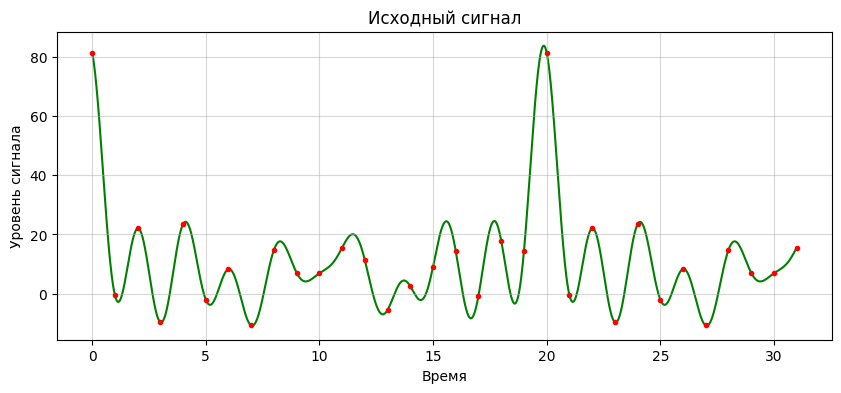

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(continum_t, analog_signal, color='g', zorder=1)
plt.scatter(t, signal, color='r', marker='.', zorder=2)
plt.grid(alpha=0.5)
plt.title("Исходный сигнал")
plt.xlabel("Время")
plt.ylabel("Уровень сигнала")
plt.show()

### Задание 3

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

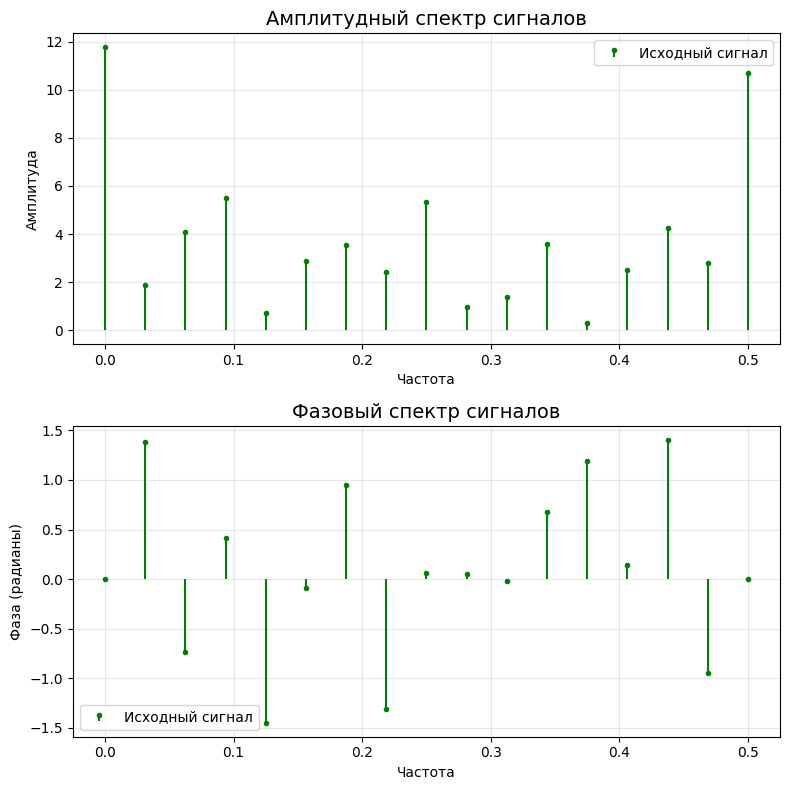

In [9]:
dft_spectrum = np.fft.fft(signal)
spectrum_plot([dft_spectrum], ["Исходный сигнал"])

### Задание 4

Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

In [10]:
linear_5 = np.convolve(signal, np.ones(5) / 5, mode='same')
linear_9 = np.convolve(signal, np.ones(9) / 9, mode='same')

Формулы передаточной функции фильтра для линейного сглаживания по $n$ точкам

Для 5 точек $H(\omega) = \frac{1}{5}(1 + 2\cos \omega + 2\cos 2\omega)$

Для 9 точек $H(\omega) = \frac{1}{9}(1 + 2\cos \omega + 2\cos 2\omega + 2\cos 3\omega + 2\cos 4\omega)$

In [11]:
def H_lin(f, n):
  H = np.ones(f.shape)
  for i in range(1, n // 2 + 1):
    H += 2 * np.cos(i * 2 * np.pi * f)
  return H / n

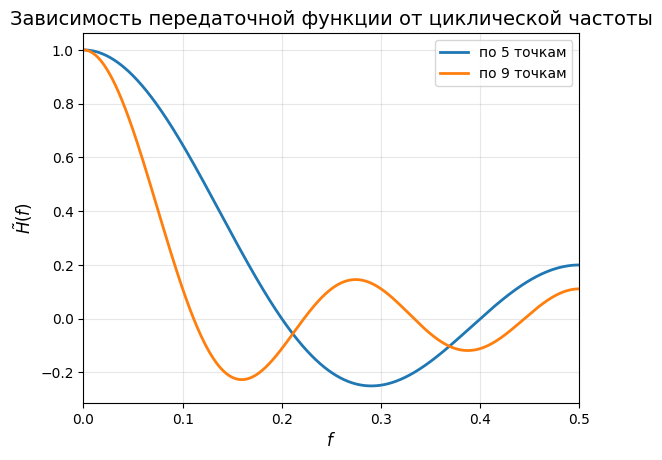

In [12]:
f = np.linspace(0, 0.5, 1000)

H_lin_5 = H_lin(f, 5)
H_lin_9 = H_lin(f, 9)

func_plot(f, [H_lin_5, H_lin_9], ["по 5 точкам", "по 9 точкам"],
          r'$\tilde{H}(f)$', "Зависимость передаточной функции от циклической частоты")

### Задание 5

Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.


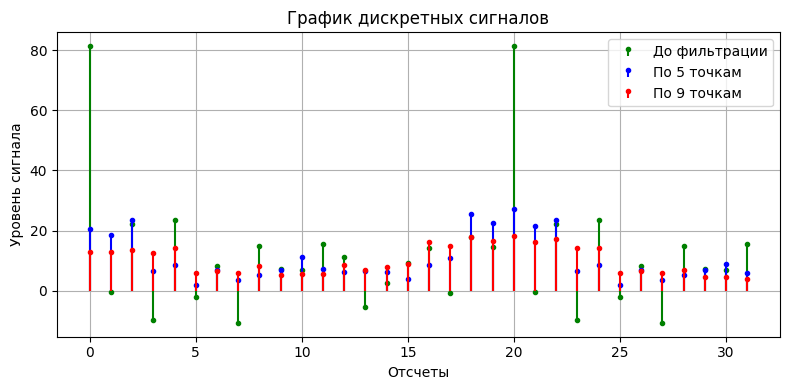

In [13]:
signals_plot([signal, linear_5, linear_9], ["До фильтрации", "По 5 точкам", "По 9 точкам"])

### Задание 6

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

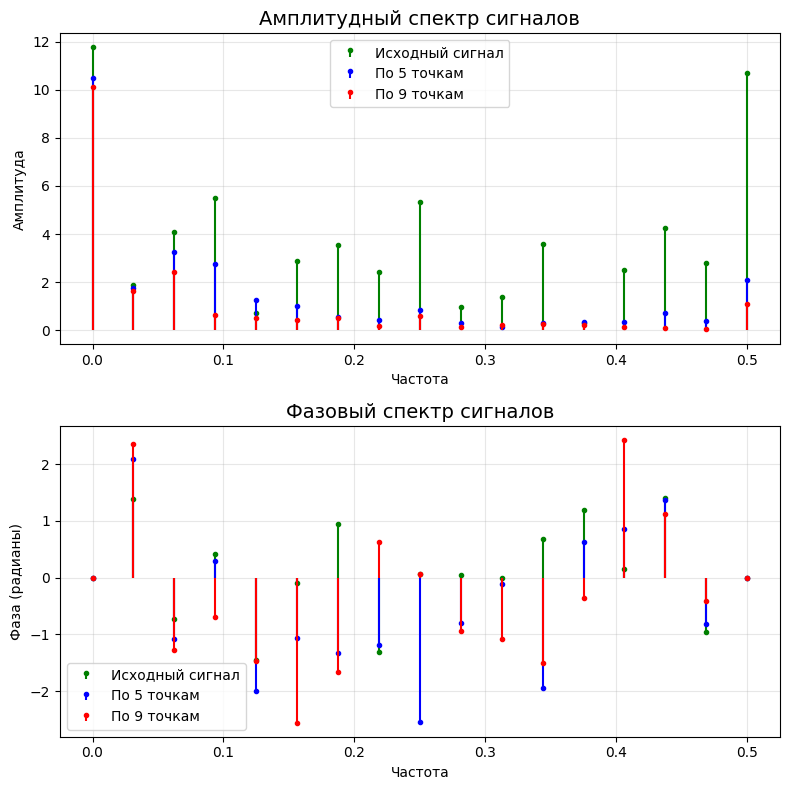

In [14]:
lin_5_spectrum = np.fft.fft(linear_5)
lin_9_spectrum = np.fft.fft(linear_9)
spectrum_plot([dft_spectrum, lin_5_spectrum, lin_9_spectrum], ["Исходный сигнал", "По 5 точкам", "По 9 точкам"])

### Задание 7

Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.



Анализ спектров отфильтрованных сигналов показал, что линейные фильтры подавляют высокие частоты и пропускают низкие. Причем чем больше ширина окна, тем уже полоса пропускания фильтра. На графике частотных спектров видно, что фильтр с большим количеством точек сильнее подавляет частоты исходного сигнала. Это согласуется с графиком передаточной функции $\tilde{H}(f)$.

### Задание 8

#### a. Сглаживание полиномом 2-ой степени по 5 и 9 узлам.




In [15]:
quad_kernel_5 = np.array([-3, 12, 17, 12, -3]) / 35
quad_kernel_9 = np.array([-21, 14, 39, 54, 59, 54, 39, 14, -21]) / 231
quad_5 = np.convolve(signal, quad_kernel_5, mode='same')
quad_9 = np.convolve(signal, quad_kernel_9, mode='same')

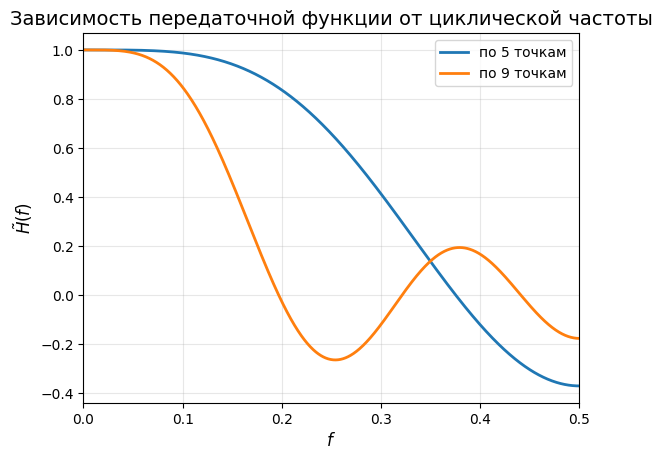

In [16]:
def H_quad(f, n):
  w = 2 * np.pi * f
  if n == 5:
    return (17 + 24 * np.cos(w) - 6 * np.cos(2 * w)) / 35
  elif n == 9:
    return (59 + 108 * np.cos(w) + 78 * np.cos(2 * w) +
            28 * np.cos(3 * w) - 42 * np.cos(4 * w)) / 231

H_quad_5 = H_quad(f, 5)
H_quad_9 = H_quad(f, 9)
func_plot(f, [H_quad_5, H_quad_9], ["по 5 точкам", "по 9 точкам"],
          r'$\tilde{H}(f)$', "Зависимость передаточной функции от циклической частоты")

Формулы передаточной функции фильтра для сглаживания полиномом второй степени по $n$ точкам

Для 5 точек $H(\omega) = \frac{1}{35}(17 + 24\cos\omega - 6\cos 2\omega)$

Для 9 точек $H(\omega)=\frac{1}{231}(59 + 108\cos\omega + 78\cos2\omega + 28\cos3\omega - 42\cos4\omega)$

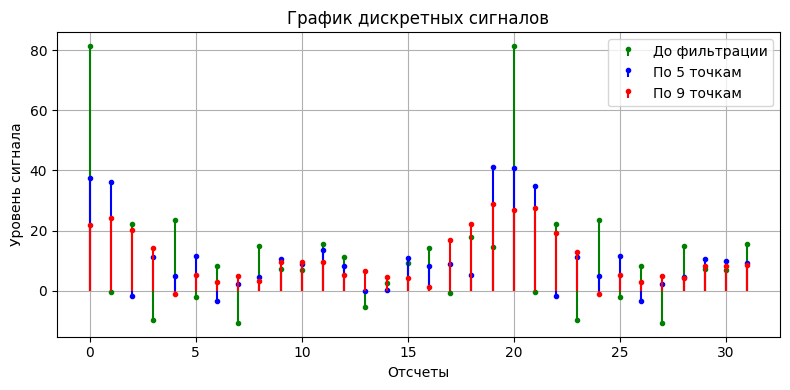

In [17]:
signals_plot([signal, quad_5, quad_9], ["До фильтрации", "По 5 точкам", "По 9 точкам"])

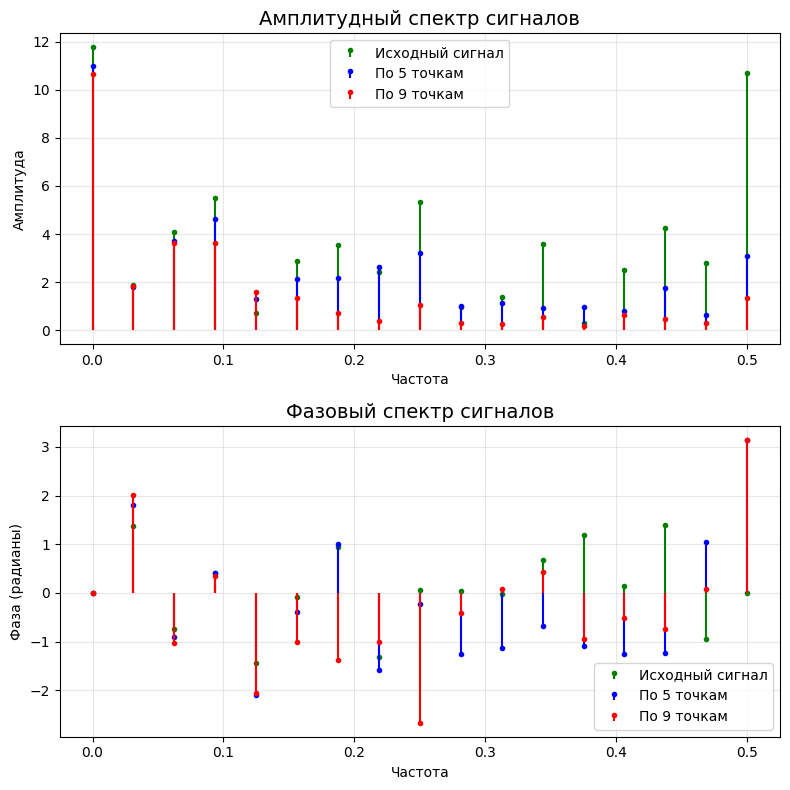

In [18]:
quad_5_spectrum = np.fft.fft(quad_5)
quad_9_spectrum = np.fft.fft(quad_9)
spectrum_plot([dft_spectrum, quad_5_spectrum, quad_9_spectrum], ["Исходный сигнал", "По 5 точкам", "По 9 точкам"])

Анализ частотных спектров исходного и отфильтрованных сигналов соответствует свойствам передаточной функции. Фильтры полиномиального сглаживания подавляют высокие частоты, причем у фильтра по 5 точкам полоса пропускание шире, чем у фильтра по 9 точкам. На фазовом спектре заметна область, где фазы инвертируются. Это происходит там, где значение передаточной функции отрицательно.

#### b. Сглаживание полиномом 4-ой степени по 7 и 11 узлам.


In [19]:
fourth_kernel_7 = np.array([5, -30, 75, 131, 75, -30, 5]) / 231
fourth_kernel_11 = np.array([18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18]) / 429

fourth_7 = np.convolve(signal, fourth_kernel_7, mode='same')
fourth_11 = np.convolve(signal, fourth_kernel_11, mode='same')

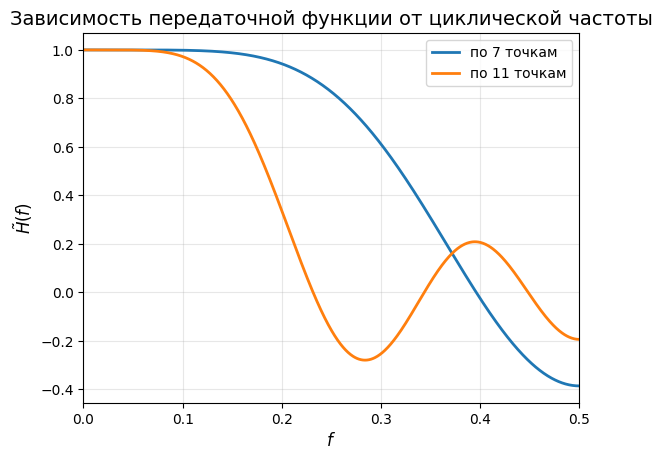

In [20]:
def H_fourth(f, n):
  w = 2 * np.pi * f
  if n == 7:
    return (131 + 150 * np.cos(w) - 60 * np.cos(2 * w) + 10 * np.cos(3 * w)) / 231
  elif n == 11:
    return (143 + 240 * np.cos(w) + 120 * np.cos(2 * w) - 20 * np.cos(3 * w) - 90 * np.cos(4 * w) + 36 * np.cos(5 * w)) / 429

H_fourth_7 = H_fourth(f, 7)
H_fourth_11 = H_fourth(f, 11)
func_plot(f, [H_fourth_7, H_fourth_11], ["по 7 точкам", "по 11 точкам"],
          r'$\tilde{H}(f)$', "Зависимость передаточной функции от циклической частоты")

Формулы передаточной функции фильтра для сглаживания полиномом четвертой степени по $n$ точкам

Для 7 точек $H(\omega) = \frac{1}{231}(131 + 150\cos \omega - 60\cos 2\omega + 10\cos 3\omega)$

Для 11 точек $H(\omega) = \frac{1}{429} (143 + 240\cos \omega + 120\cos 2\omega - 20\cos 3\omega - 90\cos 4\omega + 36\cos 5\omega)$

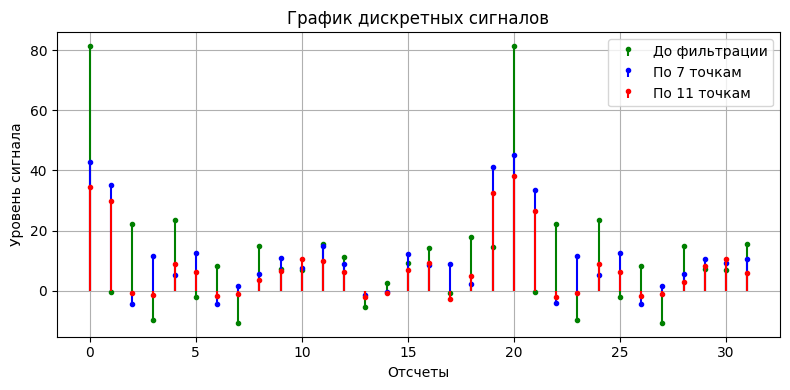

In [21]:
signals_plot([signal, fourth_7, fourth_11], ["До фильтрации", "По 7 точкам", "По 11 точкам"])

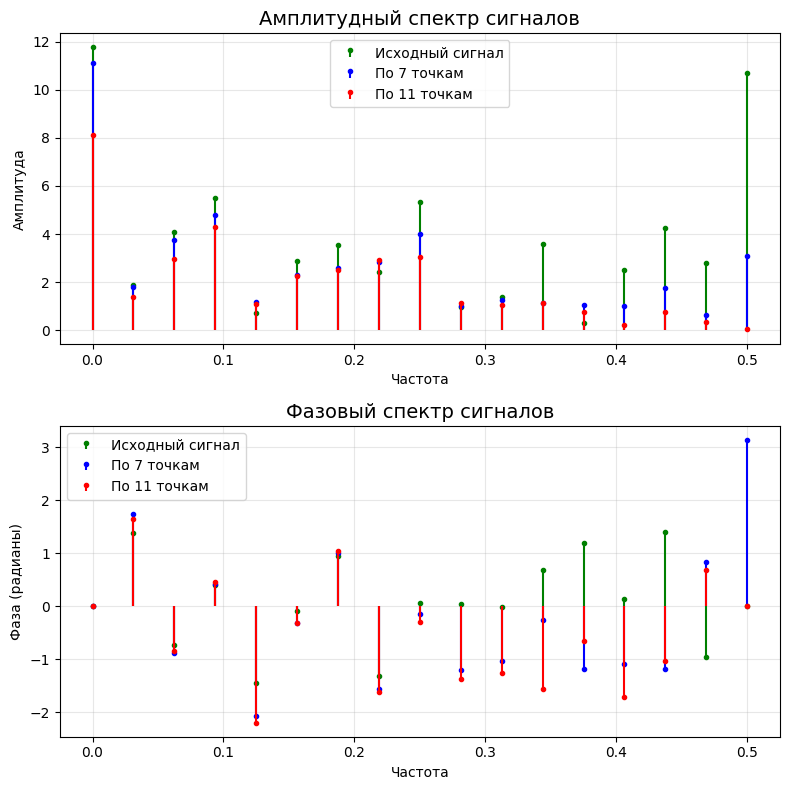

In [22]:
fourth_7_spectrum = np.fft.fft(fourth_7)
fourth_11_spectrum = np.fft.fft(fourth_11)
spectrum_plot([dft_spectrum, fourth_7_spectrum, fourth_11_spectrum], ["Исходный сигнал", "По 7 точкам", "По 11 точкам"])

По амплитудному спектру можно сделать вывод: чем выше частота, тем сильнее она подавляется фильтрами полиномиального сглаживания. Это соответствует графику передаточной функции $\tilde{H}(f)$. Фильтр с меньшим количеством узлов имеет более широкую полосу пропускания.

Оба фильтра имеют диапазон частот, в котором амплитуда сигнала не только подавляется но и инвертируется. Подтверждения этого можно увидеть на фазовом спектре в области высоких частот: некоторые фазы меняют знак, что равносильно умножению соответствующей гармоники на отрицательное число.

Также можно заметить частичное подавление гармоники с частотой $f = 0$, хотя передаточная функция для этой частоты равна $1$ для обоих фильтров. Это может быть связано с краевыми эффектами при свертке сигнала с ядром филтра, когда окно фильтра не полностью накладывается на сигнал.

## Выводы

Проведенное исследование наглядно продемонстрировало принципы работы нерекурсивных полиномиальных фильтров. Все примененные фильтры проявили себя как фильтры нижних частот, эффективно подавляя высокочастотные составляющие сигнала. Было установлено, что увеличение длины окна фильтра (с 5 до 9 точек и т.д.) приводит к сужению полосы пропускания и более резкому ослаблению высоких частот. Фильтры высших порядков (например, 2-й и 4-й степени) обеспечивают лучшую аппроксимацию и могут иметь более равномерную АЧХ в полосе пропускания по сравнению с простым усреднением. Анализ спектров с помощью ДПФ четко показал соответствие практических результатов теоретическим частотным характеристикам H(ω) каждого фильтра. Временные графики подтвердили, что фильтрация сглаживает быстрые осцилляции исходного сигнала, устраняя шум и высокочастотные компоненты. Таким образом, работа позволила получить практические навыки анализа и проектирования полиномиальных фильтров для целей сглаживания дискретных сигналов.